<a href="https://colab.research.google.com/github/CarelLuvian/Village-Data/blob/main/Unsupervised_Data_penduduk_bps_go_id_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok KACA
Muhammad Haekal Riza Sampoerna - 22523129
Carel Luvian Al Hasby - 22523085

In [ ]:
# 1. Mengimpor Pustaka yang Diperlukan
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 2. Memuat Data
# Mengimpor data dari file CSV yang diunduh dari website BPS

dataku = pd.read_csv('/content/Penduduk, Laju Pertumbuhan Penduduk, Distribusi Persentase Penduduk, Kepadatan Penduduk, Rasio Jenis Kelamin Penduduk Menurut Provinsi, 2024.csv')

In [ ]:
# 3. Menampilkan data asli
dataku.head(100)

,Provinsi,Jumlah Penduduk,Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (km2),Rasio Jenis Kelamin Penduduk,Pulau
0,Aceh,5554.8,1.39,1.97,98.0,100.9,0
1,Sumatera Utara,15588.5,1.40,5.54,215.0,100.8,0
2,Sumatera Barat,5836.2,1.43,2.07,139.0,101.5,0
3,Riau,6728.1,1.37,2.39,75.0,104.4,0
4,Jambi,3724.3,1.30,1.32,76.0,103.4,0
5,Sumatera Selatan,8837.3,1.15,3.14,102.0,103.7,0
6,Bengkulu,2112.2,1.32,0.75,105.0,104.4,0
7,Lampung,9419.6,1.20,3.34,281.0,104.3,0
8,Kepulauan Bangka Belitung,1531.5,1.36,0.54,92.0,105.4,1
9,Kepulauan Riau,2183.3,1.50,0.78,264.0,103.3,1


In [ ]:
# 4. Pra-pemrosesan Data
# Mengimput nilai yang hilang dengan menggunakan rata-rata
imputer = SimpleImputer(strategy='mean')
dataku[['Jumlah Penduduk','Laju Pertumbuhan Penduduk per Tahun','Persentase Penduduk','Kepadatan Penduduk per km persegi (km2)','Rasio Jenis Kelamin Penduduk' ]] = imputer.fit_transform(dataku[['Jumlah Penduduk','Laju Pertumbuhan Penduduk per Tahun','Persentase Penduduk','Kepadatan Penduduk per km persegi (km2)','Rasio Jenis Kelamin Penduduk']])

In [ ]:
# 5. Menampilkan data yang telah dilengkapi
dataku.head(100)

,Provinsi,Jumlah Penduduk,Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (km2),Rasio Jenis Kelamin Penduduk,Pulau
0,Aceh,5554.800000,1.390000,1.970000,98.000000,100.900000,0
1,Sumatera Utara,15588.500000,1.400000,5.540000,215.000000,100.800000,0
2,Sumatera Barat,5836.200000,1.430000,2.070000,139.000000,101.500000,0
3,Riau,6728.100000,1.370000,2.390000,75.000000,104.400000,0
4,Jambi,3724.300000,1.300000,1.320000,76.000000,103.400000,0
5,Sumatera Selatan,8837.300000,1.150000,3.140000,102.000000,103.700000,0
6,Bengkulu,2112.200000,1.320000,0.750000,105.000000,104.400000,0
7,Lampung,9419.600000,1.200000,3.340000,281.000000,104.300000,0
8,Kepulauan Bangka Belitung,1531.500000,1.360000,0.540000,92.000000,105.400000,1
9,Kepulauan Riau,2183.300000,1.500000,0.780000,264.000000,103.300000,1


In [ ]:
# 6. Identifikasi kolom yang perlu dikonversi
# Cetak tipe data sebelum konversi
print(dataku.dtypes)

Provinsi                                    object
Jumlah Penduduk                            float64
Laju Pertumbuhan Penduduk per Tahun        float64
Persentase Penduduk                        float64
Kepadatan Penduduk per km persegi (km2)    float64
Rasio Jenis Kelamin Penduduk               float64
Pulau                                        int64
dtype: object


In [ ]:
# 7. Konversi kolom string menjadi tipe numerik (kolom 'Provinsi') untuk menyertakan kolom ini dalam clustering

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataku['Provinsi'] = le.fit_transform(dataku['Provinsi'])

In [ ]:
# 8. Cetak tipe data setelah konversi
print(dataku.dtypes)

Provinsi                                     int64
Jumlah Penduduk                            float64
Laju Pertumbuhan Penduduk per Tahun        float64
Persentase Penduduk                        float64
Kepadatan Penduduk per km persegi (km2)    float64
Rasio Jenis Kelamin Penduduk               float64
Pulau                                        int64
Klaster                                      int32
dtype: object


In [ ]:
# 9. Pilih hanya kolom numerik untuk clustering
numerik_columns = dataku.select_dtypes(include=['float64', 'int64']).columns.tolist()
data_numerik = dataku[numerik_columns]
print(data_numerik.head())

   Provinsi  Jumlah Penduduk  Laju Pertumbuhan Penduduk per Tahun  \
0         0           5554.8                                 1.39   
1        37          15588.5                                 1.40   
2        35           5836.2                                 1.43   
3        29           6728.1                                 1.37   
4         7           3724.3                                 1.30   

   Persentase Penduduk  Kepadatan Penduduk per km persegi (km2)  \
0                 1.97                                     98.0   
1                 5.54                                    215.0   
2                 2.07                                    139.0   
3                 2.39                                     75.0   
4                 1.32                                     76.0   

   Rasio Jenis Kelamin Penduduk  Pulau  
0                         100.9      0  
1                         100.8      0  
2                         101.5      0  
3                 

In [ ]:
# 10. Memilih subset kolom yang digunakan sebagai fitur (feature) untuk melatih model prediksi atau analisis klaster.
X = data_numerik[['Provinsi', 'Jumlah Penduduk']]
print(X)

    Provinsi  Jumlah Penduduk
0          0      5554.800000
1         37     15588.500000
2         35      5836.200000
3         29      6728.100000
4          7      3724.300000
5         36      8837.300000
6          3      2112.200000
7         18      9419.600000
8         16      1531.500000
9         17      2183.300000
10         5     10684.900000
11         8     50345.200000
12         9     37892.300000
13         4      3759.500000
14        10     41814.500000
15         2     12431.400000
16         1      4433.300000
17        21      5646.000000
18        22      5656.000000
19        11      5695.500000
20        13      2809.700000
21        12      4273.400000
22        14      4045.900000
23        15       739.800000
24        34      2701.800000
25        32      3121.800000
26        31      9463.400000
27        33      2793.100000
28         6      1227.800000
29        30      1503.200000
30        19      1945.600000
31        20      1355.600000
32        

<Axes: xlabel='Provinsi', ylabel='Jumlah Penduduk'>

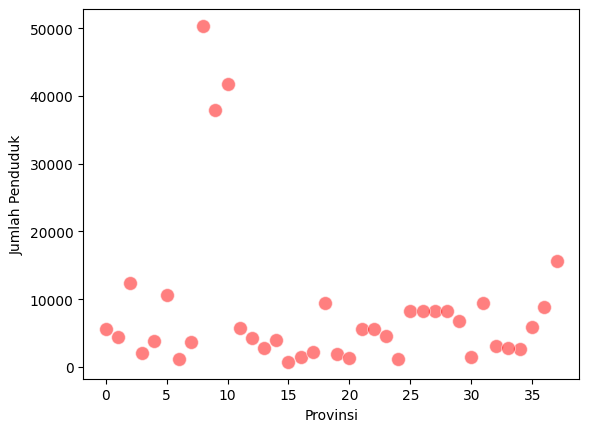

In [ ]:
# 11. Membuat scatter plot menggunakan library Seaborn
import seaborn as sns
sns.scatterplot(x="Provinsi", y="Jumlah Penduduk", data=X, s=100, color="red", alpha = 0.5)

In [ ]:
# 12. Menerapkan K-means clustering
kmeans = KMeans(n_clusters=3, random_state=50)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# 13. Evaluasi model dengan menghitung silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6473920871570198


Silhouette Score: Silhouette score mengukur seberapa baik setiap sampel dikelompokkan ke dalam cluster-clusternya masing-masing berdasarkan jarak antara sampel dengan sampel-sampel dalam cluster yang sama dibandingkan dengan cluster lainnya.

Nilai mendekati 1 menunjukkan bahwa cluster tersebut sangat terpisah dengan baik dan objek sangat cocok dengan cluster mereka sendiri. Nilai 0.647 menunjukkan klasterisasi yang cukup baik.

In [ ]:
# 14. Visualisasi Hasil
# Mendapatkan koordinat pusat klaster/centroid
centroids = kmeans.cluster_centers_
print("Koordinat Centroid:")
print(centroids)


Koordinat Centroid:
[[1.71666667e+01 3.26661250e+03]
 [9.00000000e+00 4.33506667e+04]
 [2.40000000e+01 9.66209733e+03]]


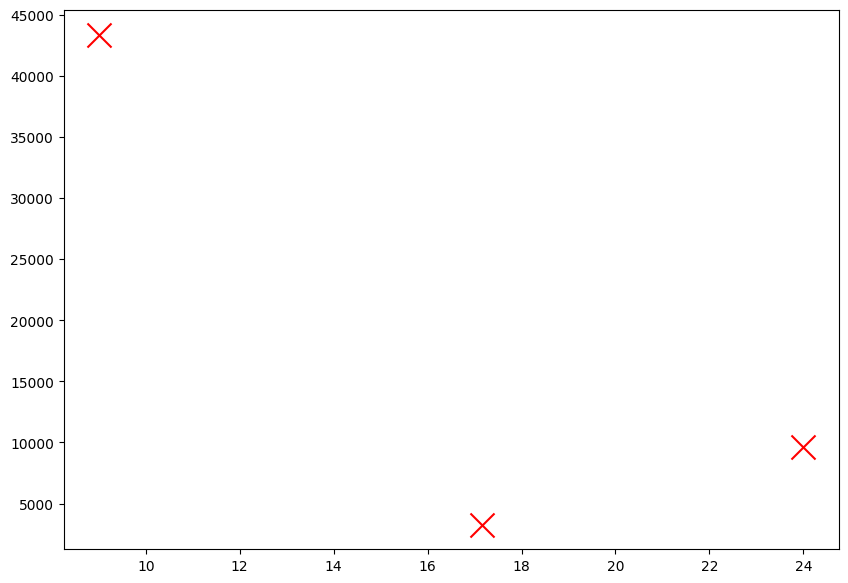

In [ ]:
# 15. Plot centroid
plt.figure(figsize=(10, 7))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, c='red', label='Centroid')

In [ ]:
# 16. Menambahkan label klaster ke DataFrame asli
dataku['Klaster'] = clusters
data = pd.DataFrame(dataku)
print(data)

    Provinsi  Jumlah Penduduk  Laju Pertumbuhan Penduduk per Tahun  \
0          0      5554.800000                             1.390000   
1         37     15588.500000                             1.400000   
2         35      5836.200000                             1.430000   
3         29      6728.100000                             1.370000   
4          7      3724.300000                             1.300000   
5         36      8837.300000                             1.150000   
6          3      2112.200000                             1.320000   
7         18      9419.600000                             1.200000   
8         16      1531.500000                             1.360000   
9         17      2183.300000                             1.500000   
10         5     10684.900000                             0.310000   
11         8     50345.200000                             1.130000   
12         9     37892.300000                             0.990000   
13         4      37

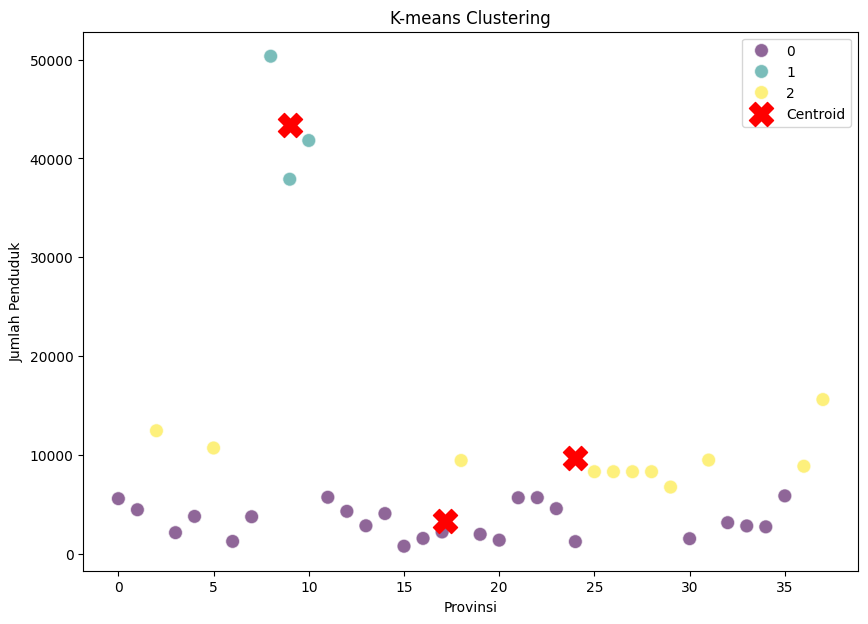

In [ ]:
plt.figure(figsize=(10, 7))
# Use 'dataku' instead of 'X' for plotting since 'Klaster' column is in 'dataku'
sns.scatterplot(x='Provinsi', y='Jumlah Penduduk', hue='Klaster', data=dataku, palette='viridis', s=100, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Penduduk')
plt.legend()
plt.show()